Procedure:
*  Import Dataset
*  EDA:Check for datatypes, Missing & duplicate values, Check for outliers, 
Correlation analysis
*   Model building with multiple linear regression 
*   Model Validation: Check for multi collinearity,normality of error, residual analysis through error plots
*   Model deletion diagnostics: Removing outliers


In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm

In [2]:
#import dataset
data=pd.read_excel('ToyotaCorolla.xlsx')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


**EDA**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
#Consider only the below columns and prepare a prediction model for predicting Price.
#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]
data1=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [5]:
data2=data1.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
data2.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


<Axes: >

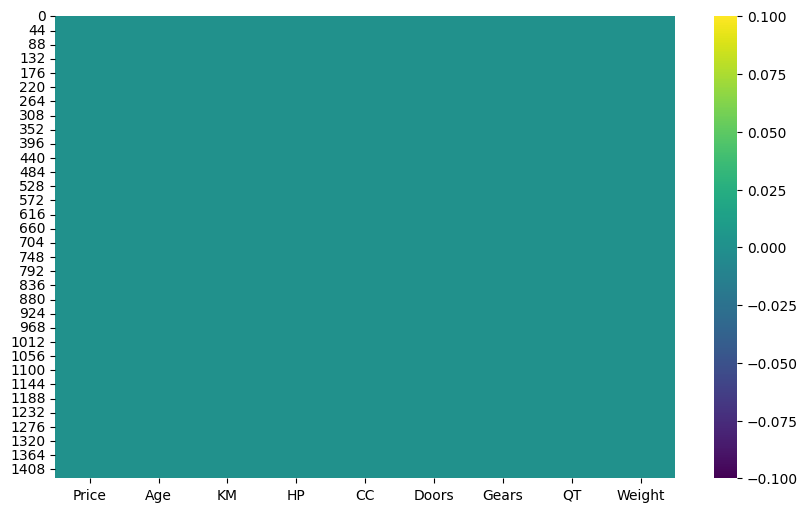

In [6]:
#Checking for missing values using heatmaps
plt.figure(figsize=(10,6))
sns.heatmap(data2.isnull(),cmap='viridis')


No missing values found

In [15]:
#Correlation Analysis
data2.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [16]:
# Check for duplicates,delete if found
data2[data2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
data3=data2.drop_duplicates().reset_index(drop=True)

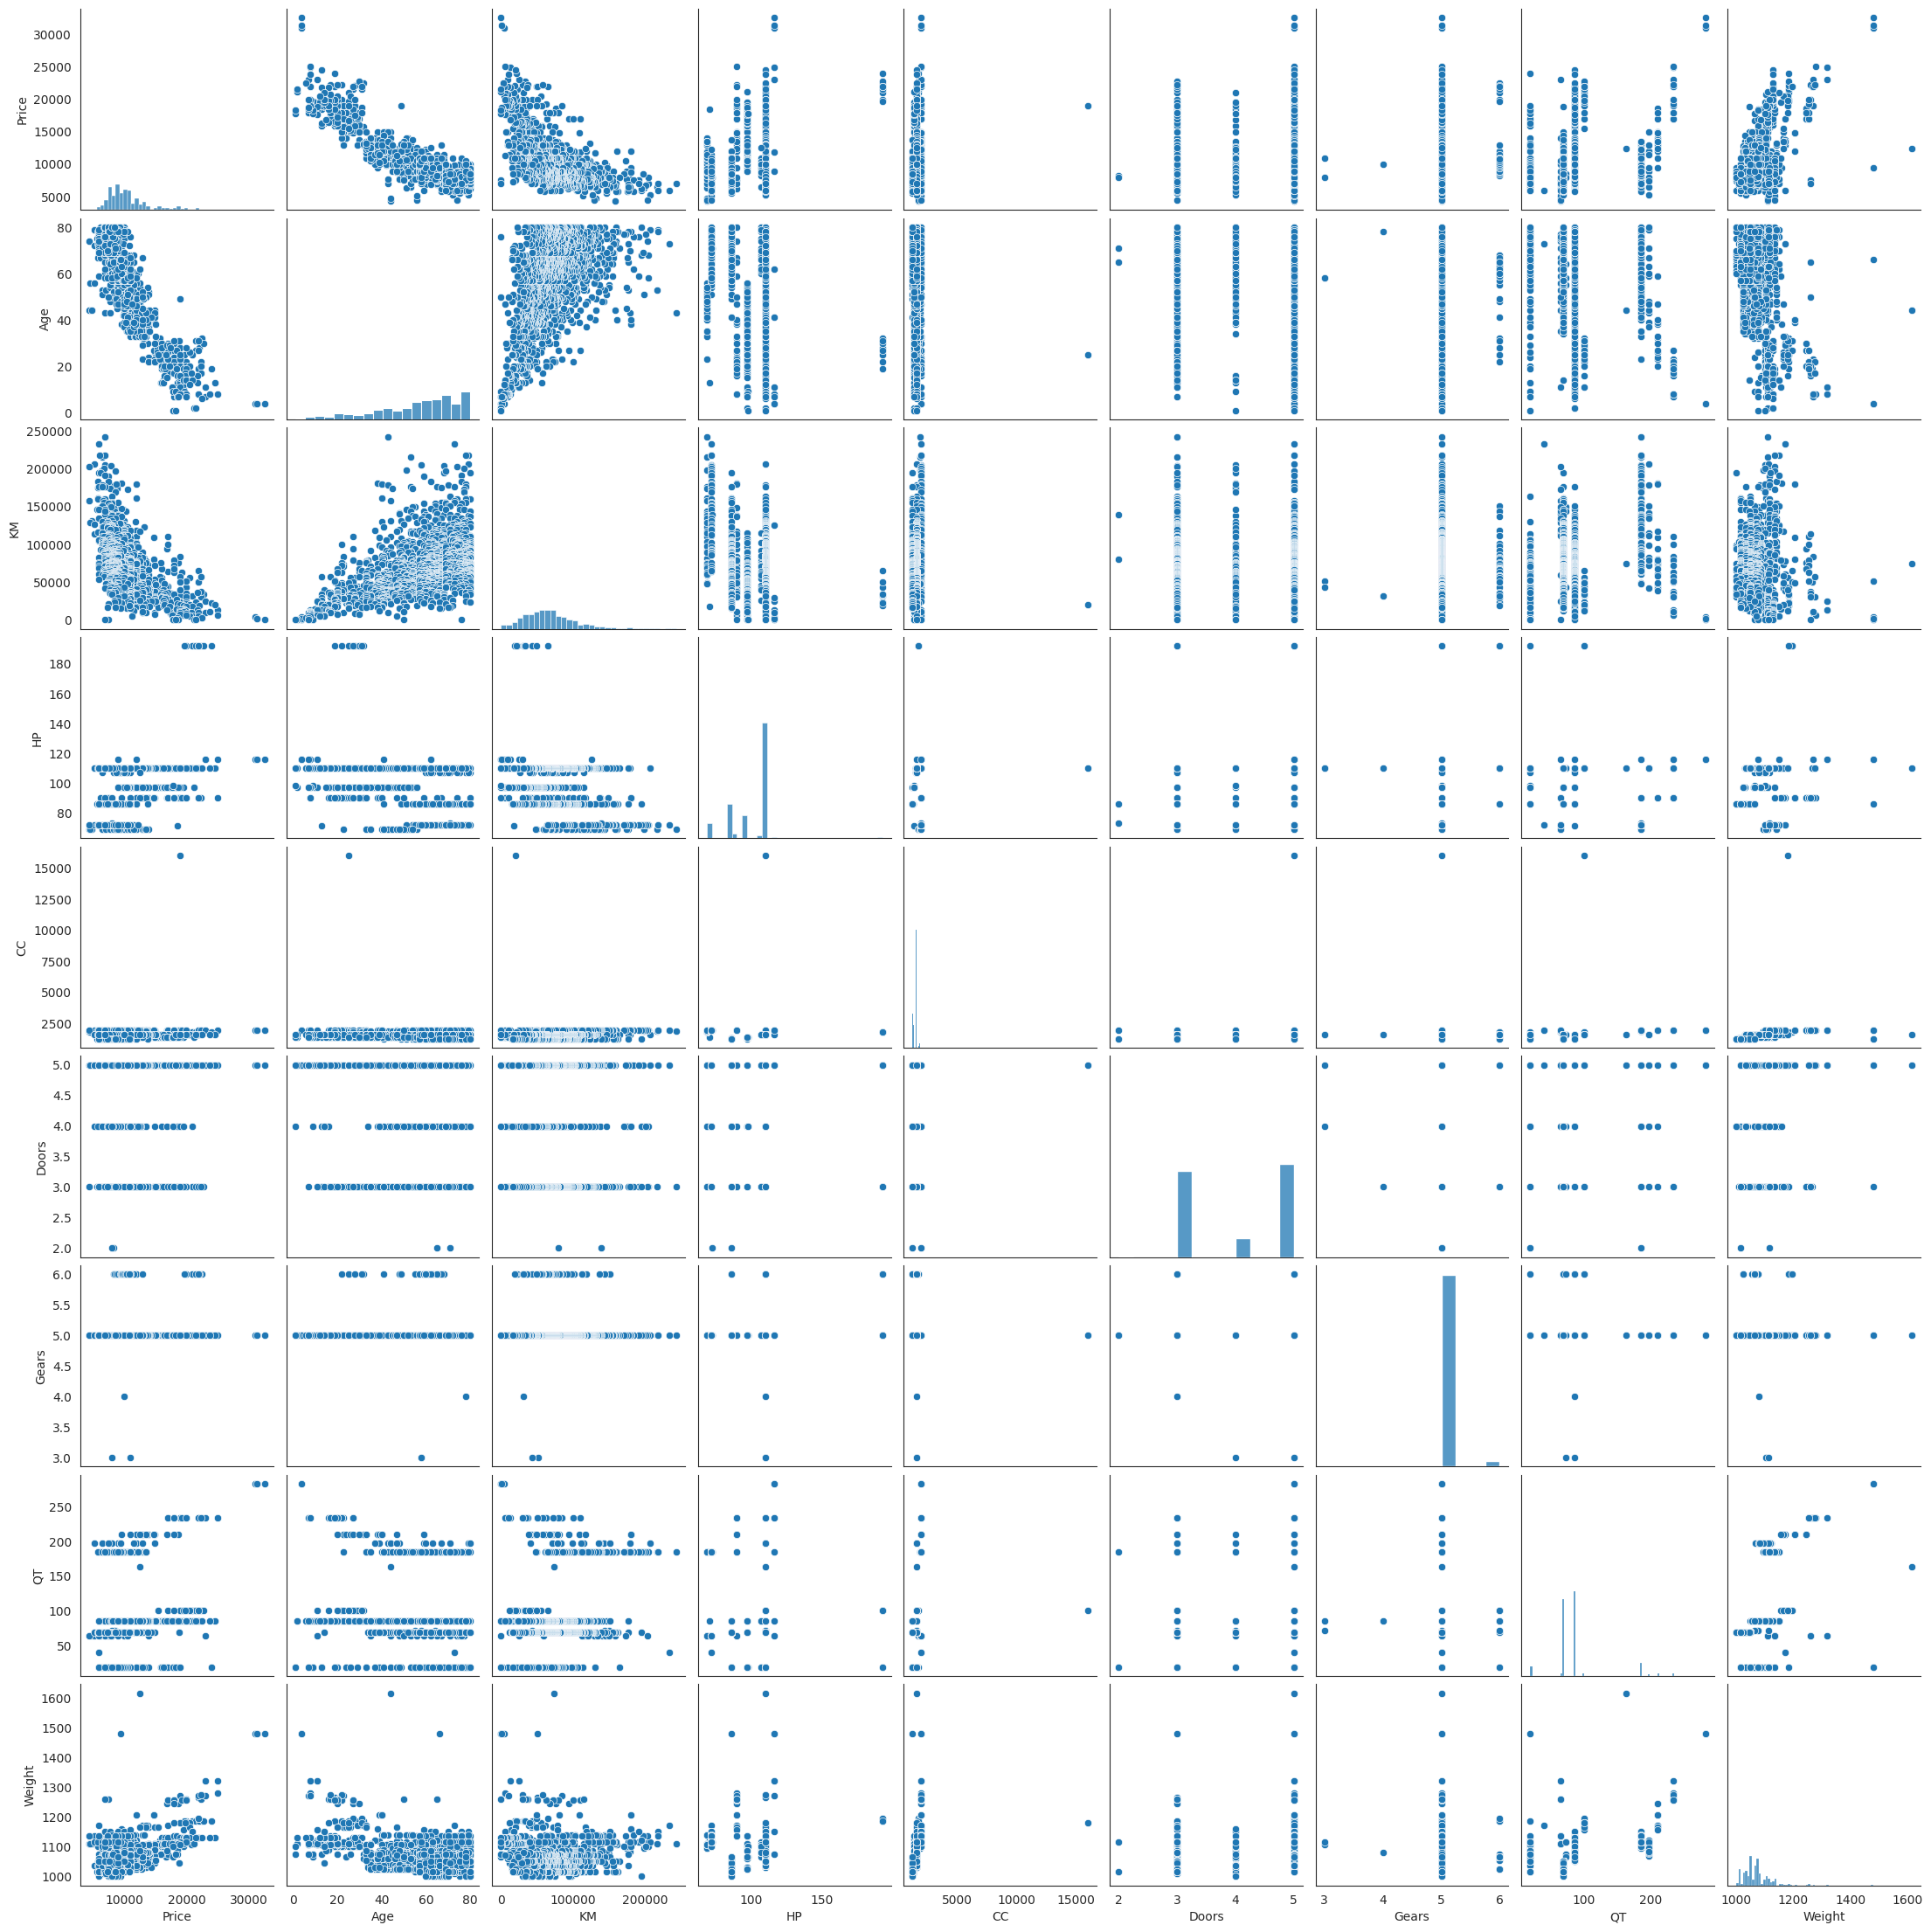

In [11]:
sns.set_style(style='white')
sns.pairplot(data3)

**Model building**

Assumptions: 

*   Linear relation should exist b/w target and independent variables
*   All the variables should be independent to each other
*   No multicollinearity
*   No hetroscadasticity
*   Normally distrubuted errors

In [19]:
data3.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [13]:
model=sm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        09:32:27   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Observe t and P values for dependent variable and noticed that Doors & CC have insignificant t and P values as its Pvalue>0.05

 Build regression models with the different combination of Doors & CC 


In [14]:
CC_model = sm.ols("Price~CC", data = data3).fit()
CC_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.29e-06
Time:                        09:32:33   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
Doors_model=sm.ols("Price~Doors",data=data3).fit()
Doors_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.40e-12
Time:                        09:32:39   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
CC_Doors_model=sm.ols("Price~CC+Doors",data=data3).fit()
CC_Doors_model.pvalues

Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64

All the above three have significant pvalue

**Model Validation** :
**1. Collinearity Check 2. Check for hetroscadasticity 3.Residual analysis**

In [27]:
#1 Collinearity Check with VIF: drop the variables having VIF>20
#VIF = 1/(1-R^2)

rsq_age=sm.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=sm.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=sm.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=sm.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=data3).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=sm.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=data3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=sm.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=data3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=sm.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=data3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=sm.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=data3).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


No VIF>20, hence there is No Collinearity

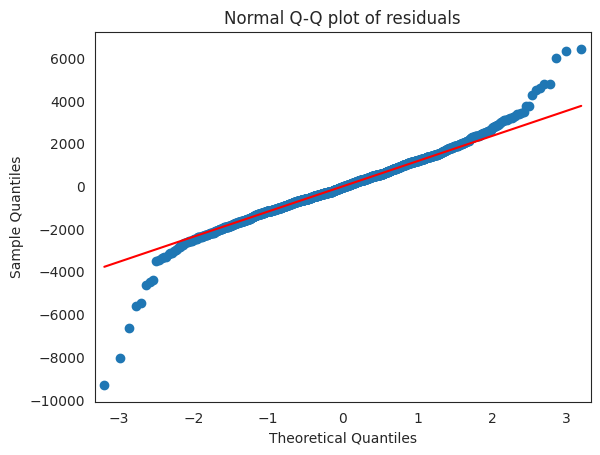

In [19]:
#Check for normality in the features
# Q-Q Plot
smf.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
# outlier detection from above QQ plot of residuals
list(np.where(model.resid>6000))  

[array([109, 146, 522])]

In [21]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

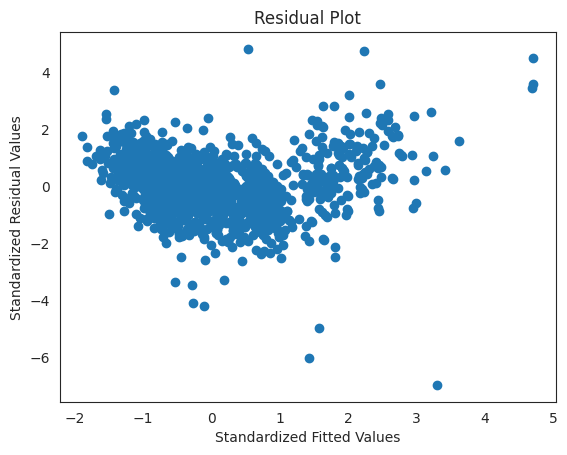

In [22]:
#2 check for hetroscadasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Hence there is no pattern observed , no hetroscadasticity

eval_env: 1


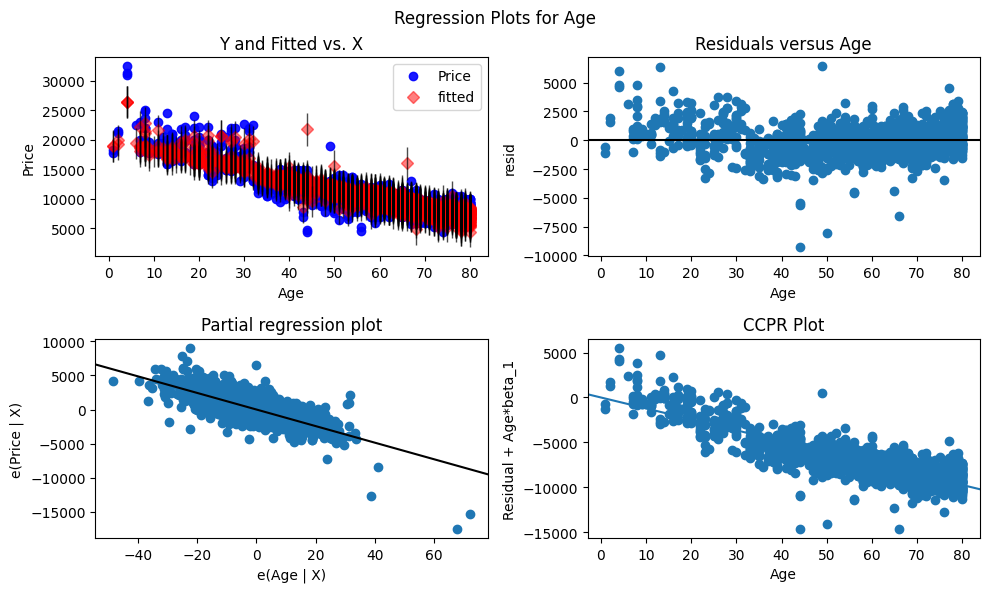

In [31]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


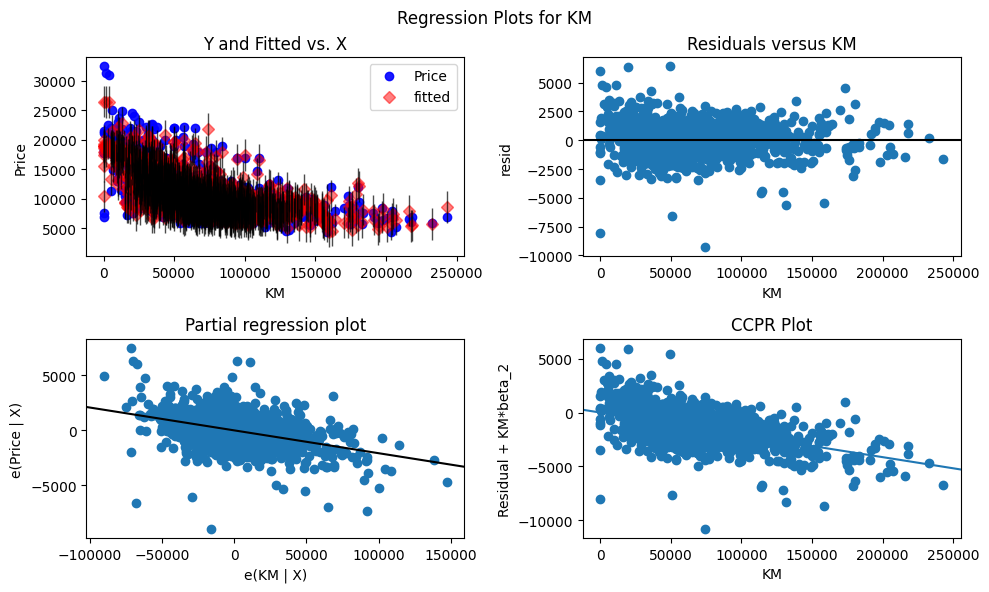

In [34]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


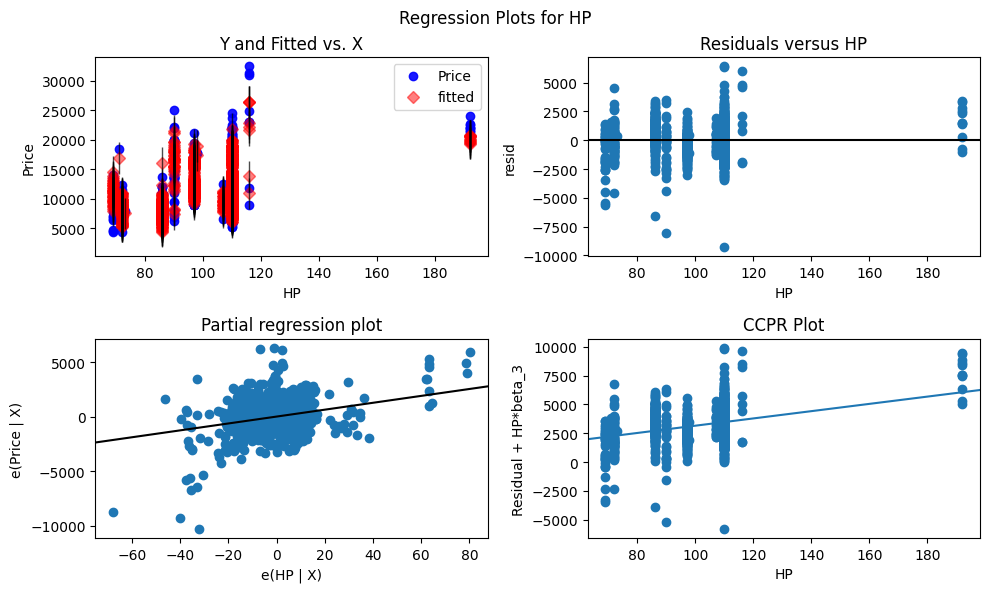

In [36]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


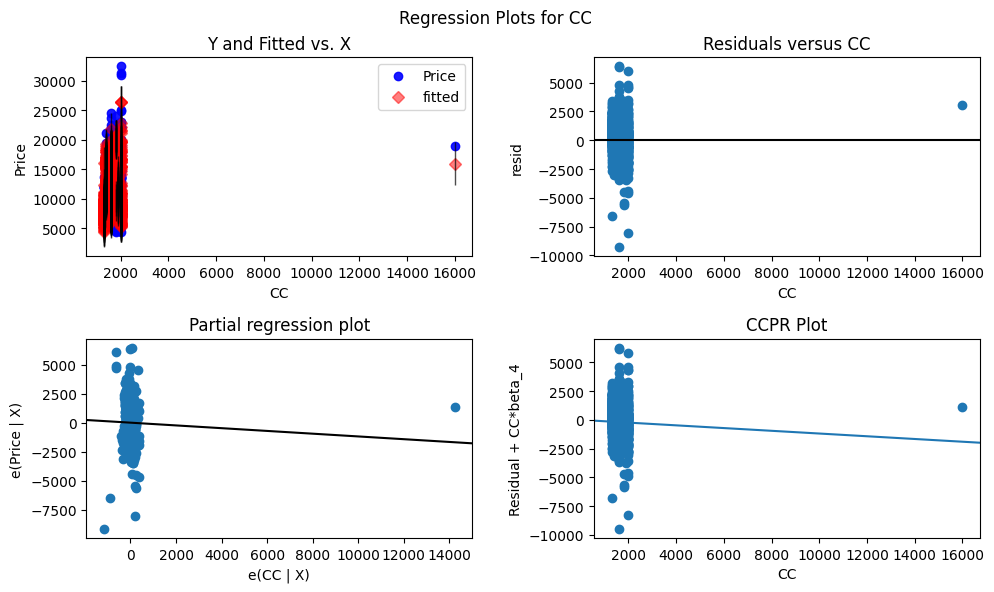

In [37]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


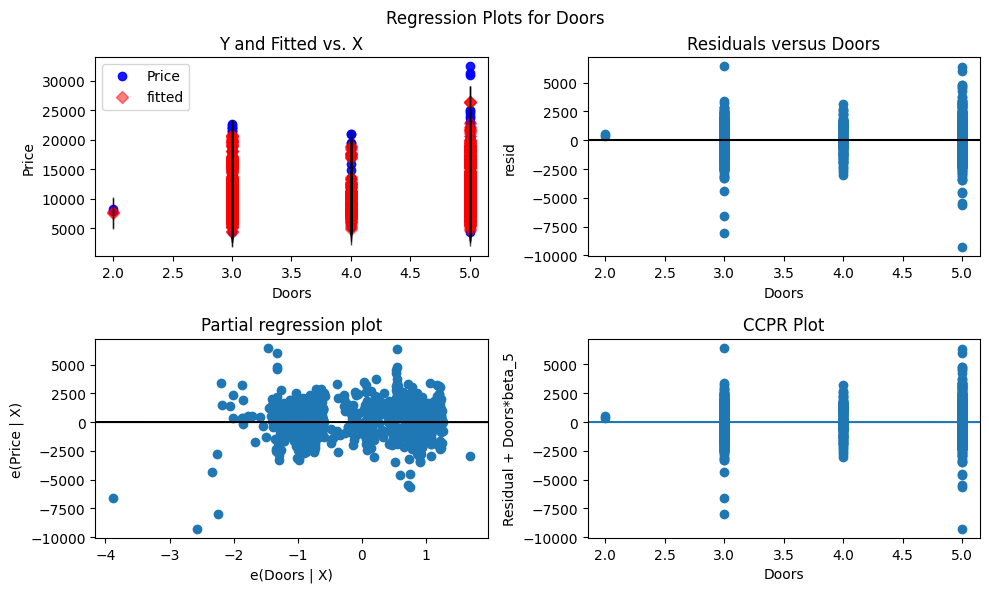

In [38]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


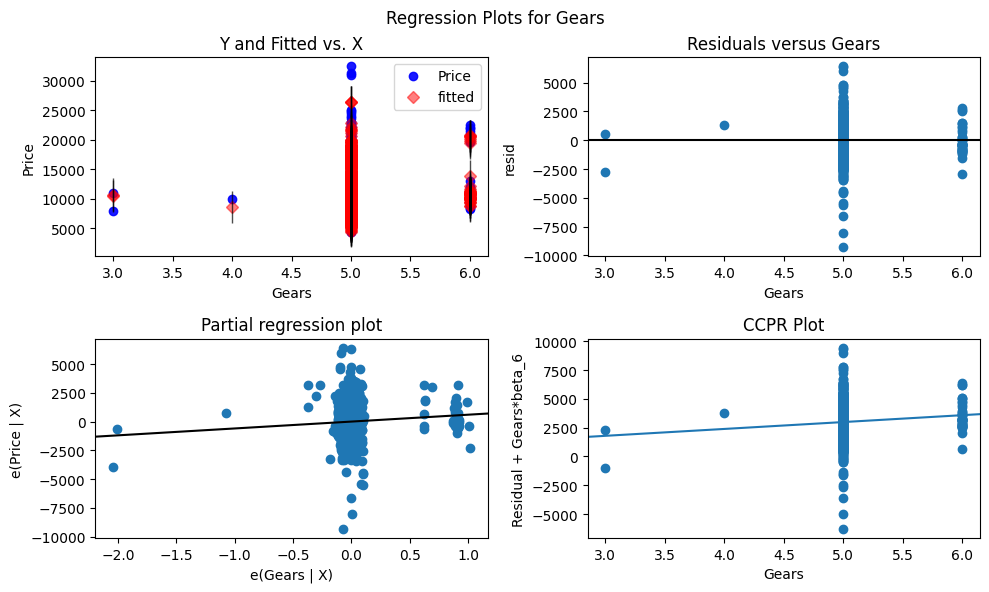

In [39]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


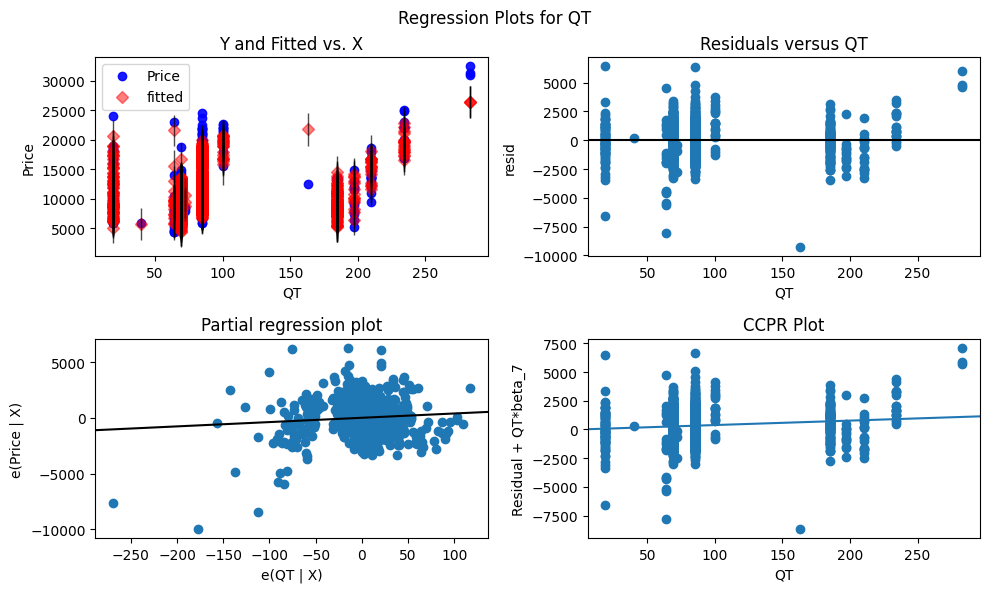

In [40]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


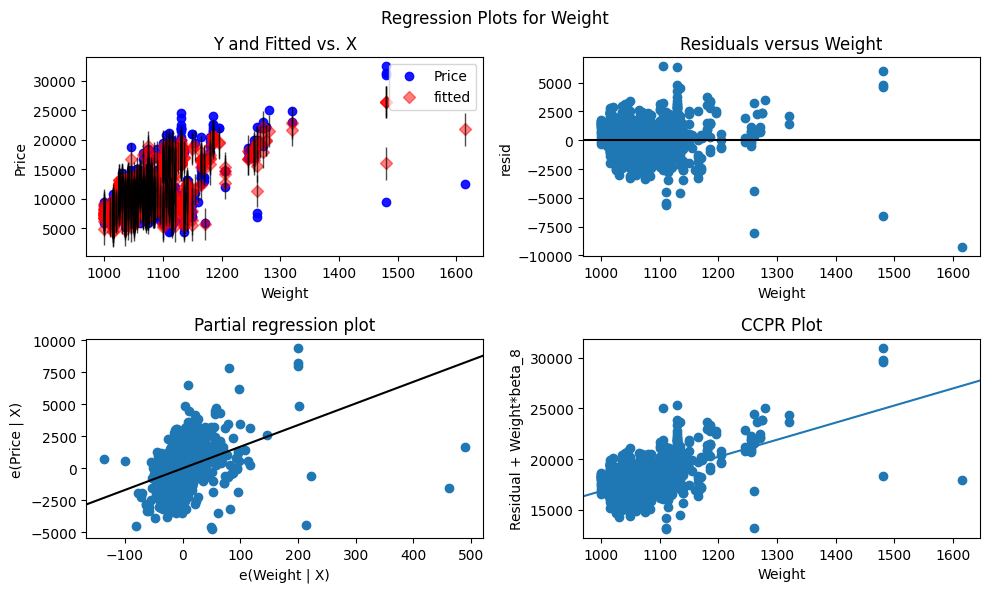

In [42]:
fig=plt.figure(figsize=(10,6))
smf.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

**Model Deletion Diagnostics**

In [43]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance

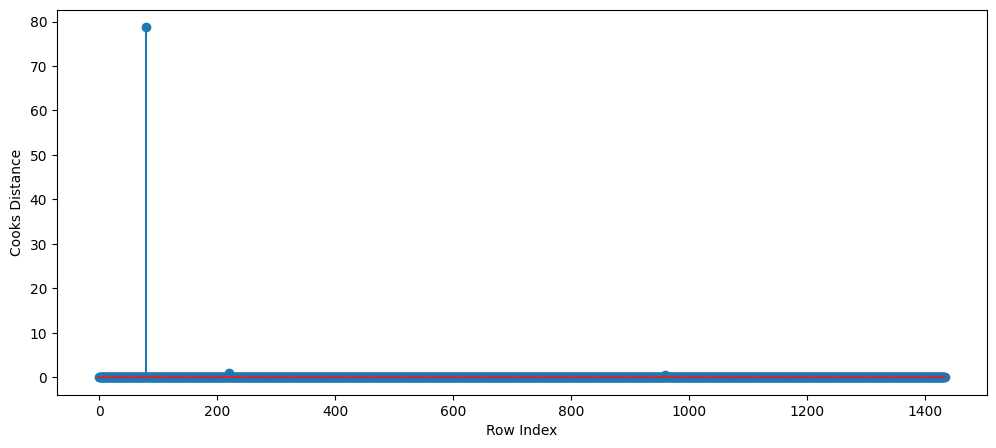

In [44]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(12,5))
plt.stem(np.arange(len(data3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

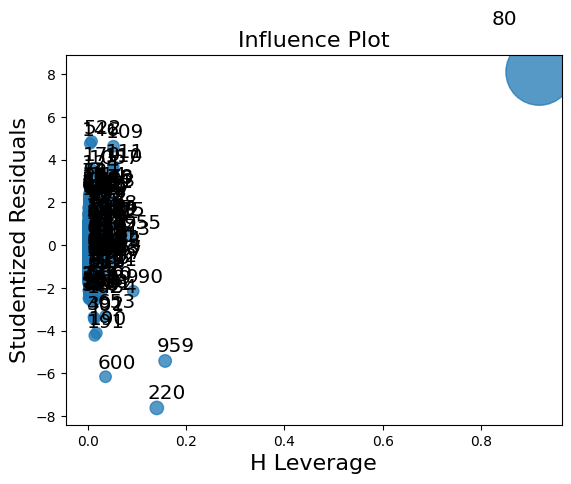

In [46]:
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [47]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data3.shape[1]
n=data3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [24]:
# The outlier is
data3[data3.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [25]:
#Improve the model
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data4=data3.drop(data3.index[[80]],axis=0).reset_index(drop=True)

In [28]:
#build the model deleting the oulier
model1=sm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data4).fit()
print(model1.rsquared, model1.aic)

0.8681163912634055 24669.363894157


In [29]:
#build the model deleting the oulier with out Doors
model1=sm.ols('Price~Age+KM+HP+CC+Gears+QT+Weight',data=data4).fit()
print(model1.rsquared, model1.aic)

0.8680741306155819 24667.8233300342


In [30]:
#build the model deleting the oulier with out CC
model1=sm.ols('Price~Age+KM+HP+Doors+Gears+QT+Weight',data=data4).fit()
print(model1.rsquared, model1.aic)

0.8619510191654682 24732.88159628498


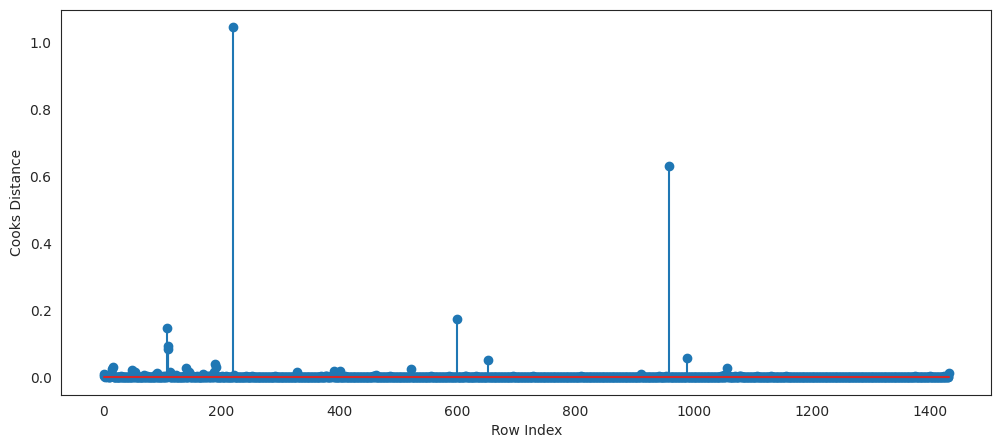

In [34]:
(c,_)=model1.get_influence().cooks_distance
fig=plt.figure(figsize=(12,5))
plt.stem(np.arange(len(data4)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(219, 1.044827846103687)

In [36]:
#Improve the model
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data5=data4.drop(data4.index[[219]],axis=0).reset_index(drop=True)

In [38]:
#build the model deleting the oulier
model2=sm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data5).fit()
print(model1.rsquared, model1.aic)

0.8765926307402282 24557.748263908954


Similarly check again for outliers using cooks distance remove if found

In [42]:
# Final model
while model.rsquared < 0.90:
    for c in [np.max(c)>0.8]:
        model=sm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data5=data5.drop(data5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data5
    else:
        final_model=sm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",model2.rsquared)

In [45]:
initial_model=sm.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=data3).fit()
initial_model.rsquared


0.8625200256947001

In [44]:
final_model.rsquared

0.9003762532318559

In [71]:
predicted = pd.DataFrame()

predicted['Actual_Price'] = data.Price
predicted['Pred_Price_F']=final_model.predict(data4)
predicted['Pred_Price_I']=model.predict(data3)
#Find error without any tranformation
predicted['Error_FinalModel']=predicted['Actual_Price'] - predicted['Pred_Price_F']
predicted['Error_InitialModel']=predicted['Actual_Price'] - predicted['Pred_Price_I']
predicted

,Actual_Price,Pred_Price_F,Pred_Price_I,Error_FinalModel,Error_InitialModel
0,13500,15755.691253,15729.432375,-2255.691253,-2229.432375
1,13750,15354.362106,15329.991147,-1604.362106,-1579.991147
2,13950,15729.011169,15702.428929,-1779.011169,-1752.428929
3,14950,15415.237858,15389.233919,-465.237858,-439.233919
4,13750,15314.008799,15287.734792,-1564.008799,-1537.734792
...,...,...,...,...,...
1431,7500,NaN,8532.098968,NaN,-1032.098968
1432,10845,NaN,8670.833903,NaN,2174.166097
1433,8500,NaN,8780.570061,NaN,-280.570061
1434,7250,NaN,11855.196236,NaN,-4605.196236
